Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
symmetries =  ['ALL']
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3


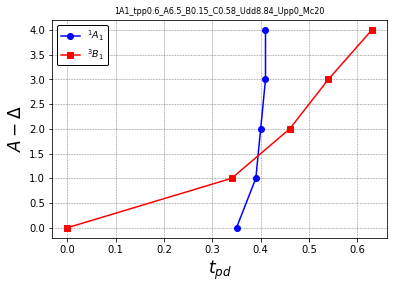

In [1]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
tpp = 0.6

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

Norb3 = 3
Norb7 = 7
Mc3 = 1
Mc7 = 20
sym = '1A1'

#fNorb3 = 'Norb3_tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc3)+'.txt'
fNorb7 = 'Norb7_'+sym+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)+'.txt'
titlename = sym+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)   

a = loadtxt('./data_lowpeak/critical_tpd_Norb7_tpp0.275_A6.5_B0.15_C0.58_Upp0_Mc16.txt',skiprows=2)
plot(a[:,0], A-a[:,2], '-bo',label="$^{1}A_1$")
plot(a[:,1], A-a[:,2], '-rs',label="$^{3}B_1$")

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
ylabel('$A-\Delta$',fontsize=17)
#xlim([0,2])
#ylim([2,4])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("phase_diagram_GS.pdf")